In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Load the datasets
file_path_countries = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\all-weeks-countries-netflix.xlsx"
file_path_global = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\all-weeks-global-netflix.xlsx"
file_path_popular = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\most-popular-netflix.xlsx"

In [98]:
# Reading the Excel files
df_countries = pd.read_excel(file_path_countries)
df_global = pd.read_excel(file_path_global)
df_popular = pd.read_excel(file_path_popular)

C:\Users\Joseph\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Joseph\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Joseph\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [99]:
# Displaying the first few rows of each dataset to inspect
print("Countries Dataset:")
print(df_countries.head())

Countries Dataset:
  country_name country_iso2        week category  weekly_rank  \
0    Argentina           AR  2024-04-14    Films            1   
1    Argentina           AR  2024-04-14    Films            2   
2    Argentina           AR  2024-04-14    Films            3   
3    Argentina           AR  2024-04-14    Films            4   
4    Argentina           AR  2024-04-14    Films            5   

                      show_title season_title  cumulative_weeks_in_top_10  
0                  The Tearsmith          NaN                           2  
1                         Stolen          NaN                           1  
2                  Love, Divided          NaN                           1  
3  Woody Woodpecker Goes to Camp          NaN                           1  
4                  Rest In Peace          NaN                           3  


In [100]:
print("\nGlobal Dataset:")
print(df_global.head())


Global Dataset:
         week         category  weekly_rank                     show_title  \
0  2024-04-14  Films (English)            1              What Jennifer Did   
1  2024-04-14  Films (English)            2  Woody Woodpecker Goes to Camp   
2  2024-04-14  Films (English)            3                          Scoop   
3  2024-04-14  Films (English)            4                          Glass   
4  2024-04-14  Films (English)            5                   Megan Leavey   

  season_title  weekly_hours_viewed  runtime  weekly_views  \
0          NaN             26100000   1.4500    18000000.0   
1          NaN             19600000   1.6667    11800000.0   
2          NaN             14600000   1.7167     8500000.0   
3          NaN             11000000   2.1500     5100000.0   
4          NaN              9700000   1.9333     5000000.0   

   cumulative_weeks_in_top_10  is_staggered_launch episode_launch_details  
0                           1                False               

In [101]:
print("\nMost Popular Dataset:")
print(df_popular.head())


Most Popular Dataset:
          category  rank              show_title season_title  \
0  Films (English)     1              Red Notice          NaN   
1  Films (English)     2           Don't Look Up          NaN   
2  Films (English)     3        The Adam Project          NaN   
3  Films (English)     4                Bird Box          NaN   
4  Films (English)     5  Leave the World Behind          NaN   

   hours_viewed_first_91_days  runtime  views_first_91_days  
0                   454200000   1.9667            230900000  
1                   408600000   2.3833            171400000  
2                   281000000   1.7833            157600000  
3                   325300000   2.0667            157400000  
4                   339300000   2.3667            143400000  


In [102]:
# Assign the datasets to variables
countries_df = pd.read_excel("C:/Users/Joseph/Desktop/School/Masters Data Science/Data Presentation/all-weeks-countries-netflix.xlsx")
global_df = pd.read_excel("C:/Users/Joseph/Desktop/School/Masters Data Science/Data Presentation/all-weeks-global-netflix.xlsx")
most_popular_df = pd.read_excel("C:/Users/Joseph/Desktop/School/Masters Data Science/Data Presentation/most-popular-netflix.xlsx")

C:\Users\Joseph\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Joseph\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Joseph\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Hours viewed shows vs. films

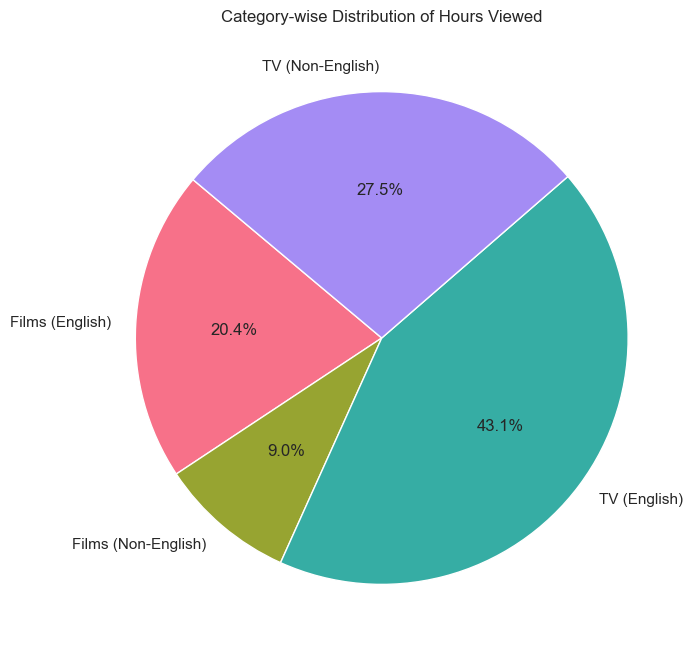

In [116]:
# Aggregate the total hours viewed by category
category_hours = df_global.groupby('category')['weekly_hours_viewed'].sum().reset_index()

# Generate a color palette
palette = sns.color_palette("husl", len(category_hours))

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_hours['weekly_hours_viewed'], 
        labels=category_hours['category'], 
        autopct='%1.1f%%', 
        colors=palette,
        startangle=140)
plt.title('Category-wise Distribution of Hours Viewed')
plt.show()

## Top 10 Shows by Hours Viewed

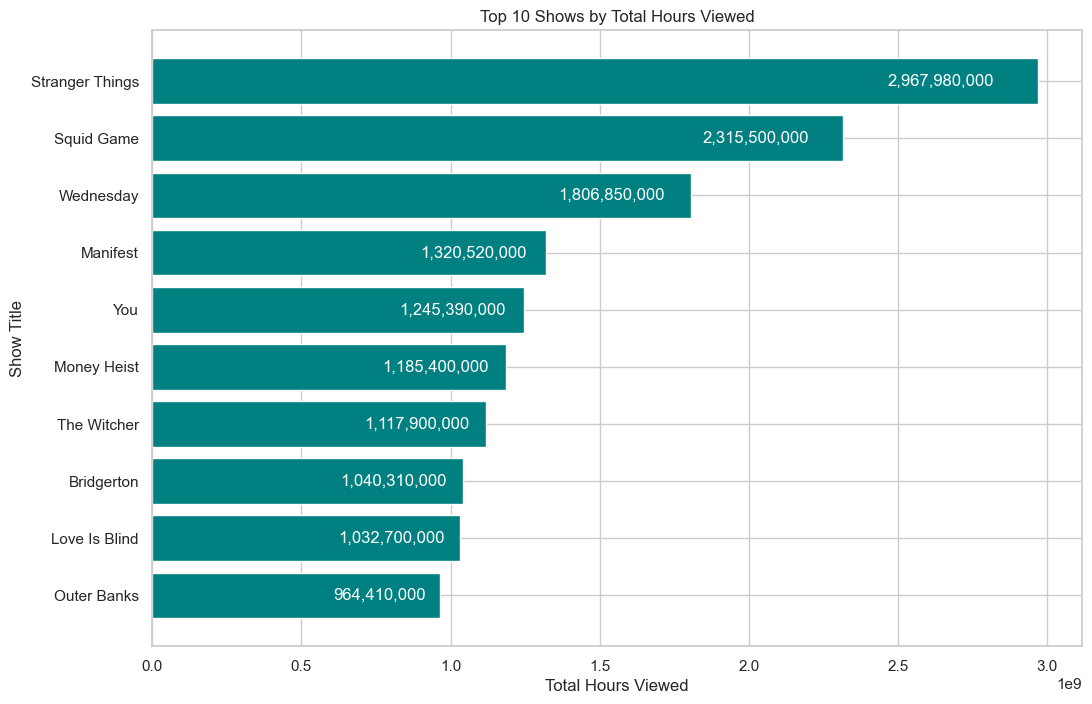

In [117]:
# Aggregate hours viewed by show title
top_shows = df_global.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()
top_shows = top_shows.sort_values('weekly_hours_viewed', ascending=False).head(10)

# Horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_shows['show_title'], top_shows['weekly_hours_viewed'], color='teal')

# Add text annotations inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - width * 0.05,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             va='center',
             ha='right',
             color='white')

plt.xlabel('Total Hours Viewed')
plt.ylabel('Show Title')
plt.title('Top 10 Shows by Total Hours Viewed')
plt.gca().invert_yaxis()
plt.show()

## Most Popular Movies

C:\Users\Joseph\AppData\Local\Temp\ipykernel_18024\383498399.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(x='views_first_91_days', y='show_title', data=top_popular_movies, palette='viridis', ci=None)


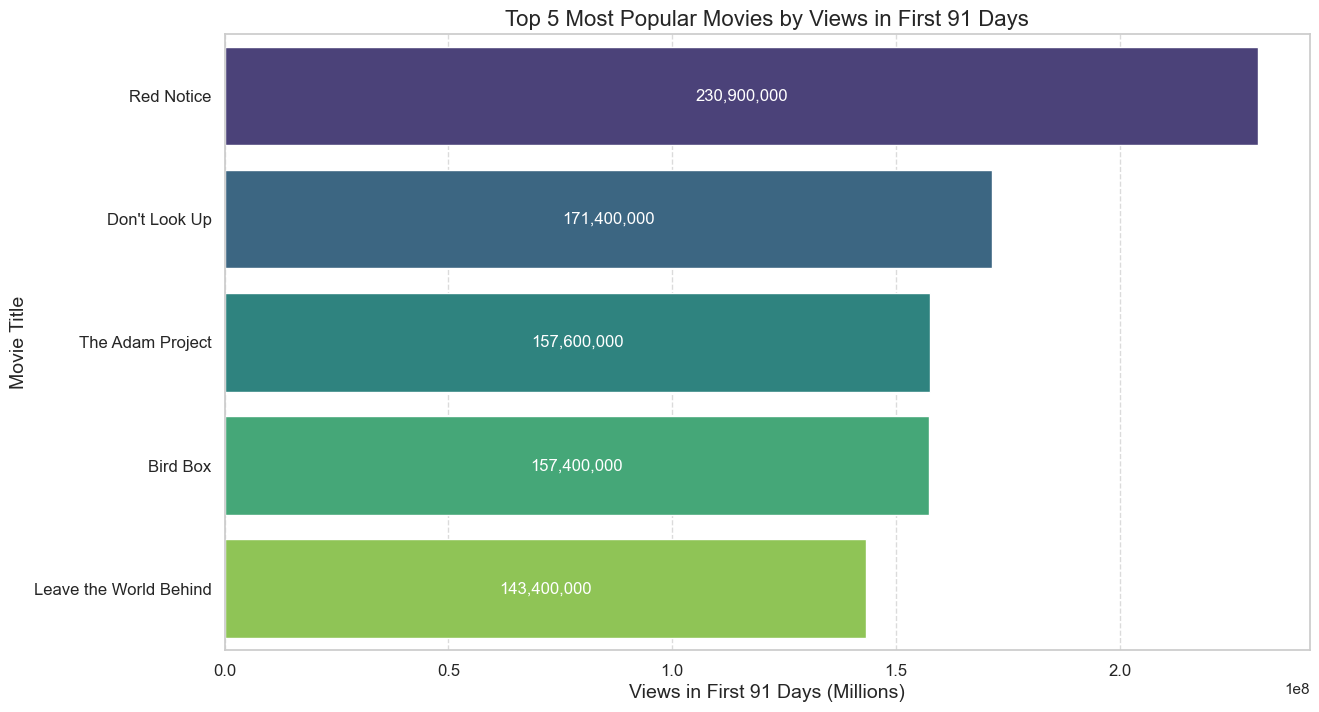

In [118]:
# Filter top 5 most popular movies globally by views in the first 91 days
top_popular_movies = most_popular_df[most_popular_df['category'] == 'Films (English)'].sort_values('views_first_91_days', ascending=False).head(5)

# Horizontal bar chart for most popular movies globally
plt.figure(figsize=(14, 8))
bars = sns.barplot(x='views_first_91_days', y='show_title', data=top_popular_movies, palette='viridis', ci=None)

# Add data labels inside the bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width * 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             va='center',
             ha='center',
             color='white',
             fontsize=12)

# Add grid lines and style
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Top 5 Most Popular Movies by Views in First 91 Days', fontsize=16)
plt.xlabel('Views in First 91 Days (Millions)', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Hours by Movie Rank

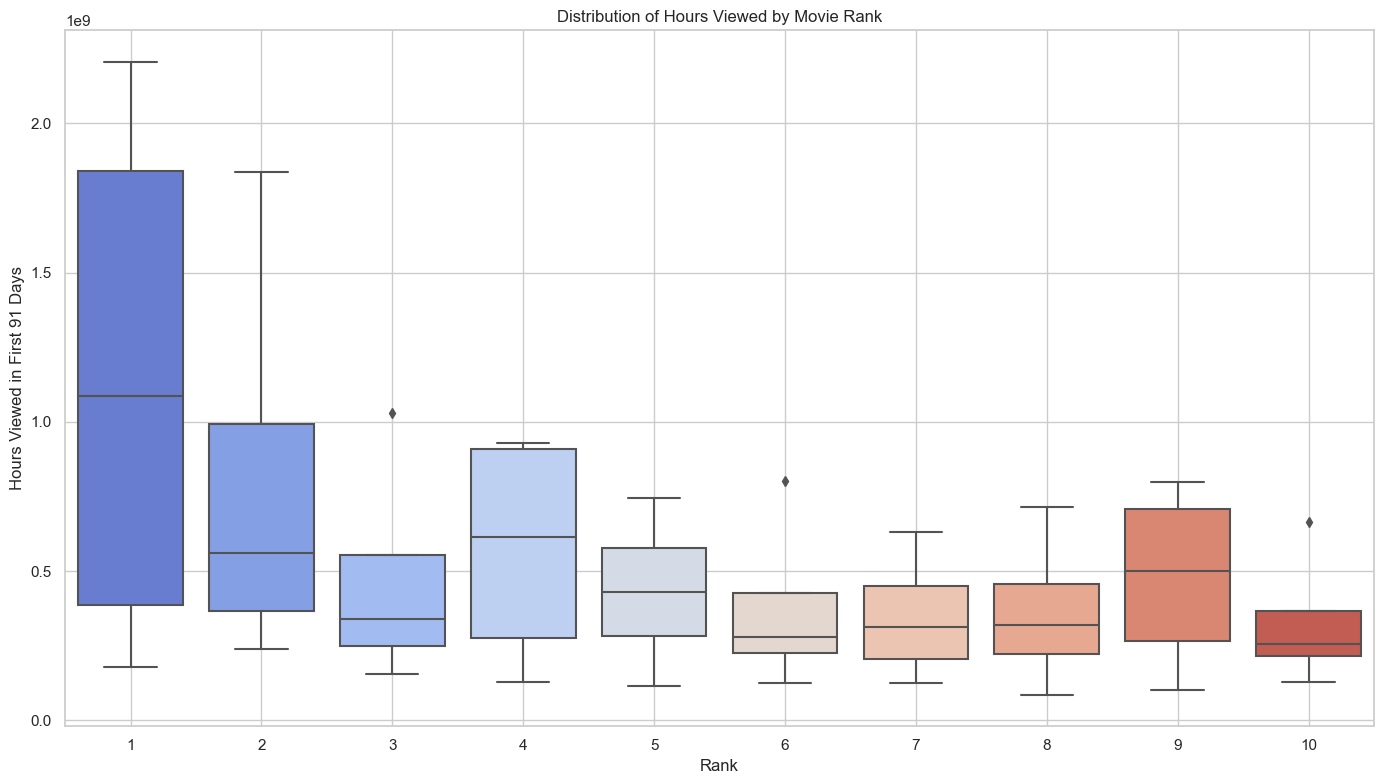

In [111]:
# Box plot to show distribution of hours viewed by rank
plt.figure(figsize=(14, 8))
sns.boxplot(x='rank', y='hours_viewed_first_91_days', data=df_popular, palette='coolwarm')
plt.title('Distribution of Hours Viewed by Movie Rank')
plt.xlabel('Rank')
plt.ylabel('Hours Viewed in First 91 Days')
plt.grid(True)
plt.tight_layout()
plt.show()

## Line Chart of Weekly Views for Top 5 Shows

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


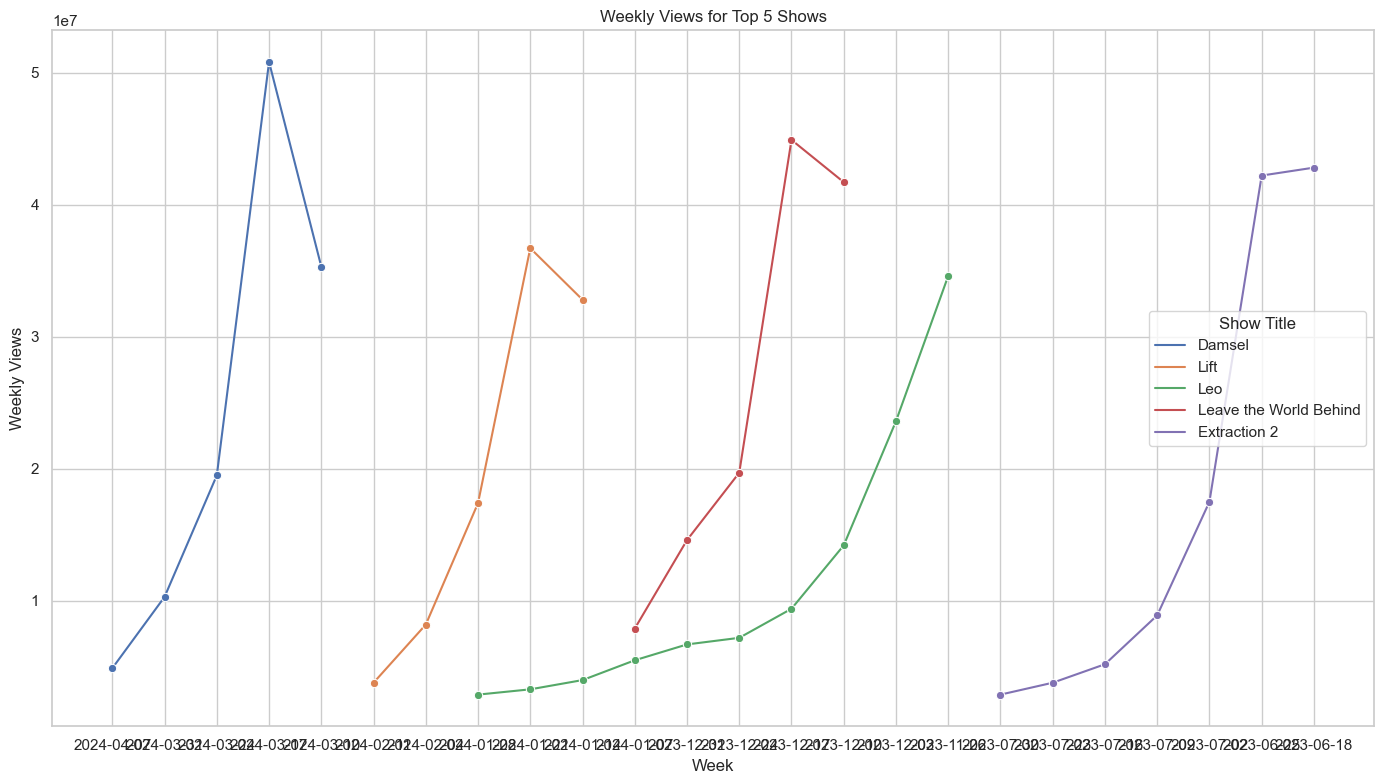

In [113]:
# Identify the top 5 shows by total weekly views
top_shows = df_global.groupby('show_title')['weekly_views'].sum().reset_index()
top_shows = top_shows.sort_values('weekly_views', ascending=False).head(5)

# Filter the global dataset for these top 5 shows
top_shows_data = df_global[df_global['show_title'].isin(top_shows['show_title'])]

# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_shows_data, x='week', y='weekly_views', hue='show_title', marker='o')
plt.title('Weekly Views for Top 5 Shows')
plt.xlabel('Week')
plt.ylabel('Weekly Views')
plt.legend(title='Show Title')
plt.grid(True)
plt.tight_layout()
plt.show()

## Cumulative top 10 rankings

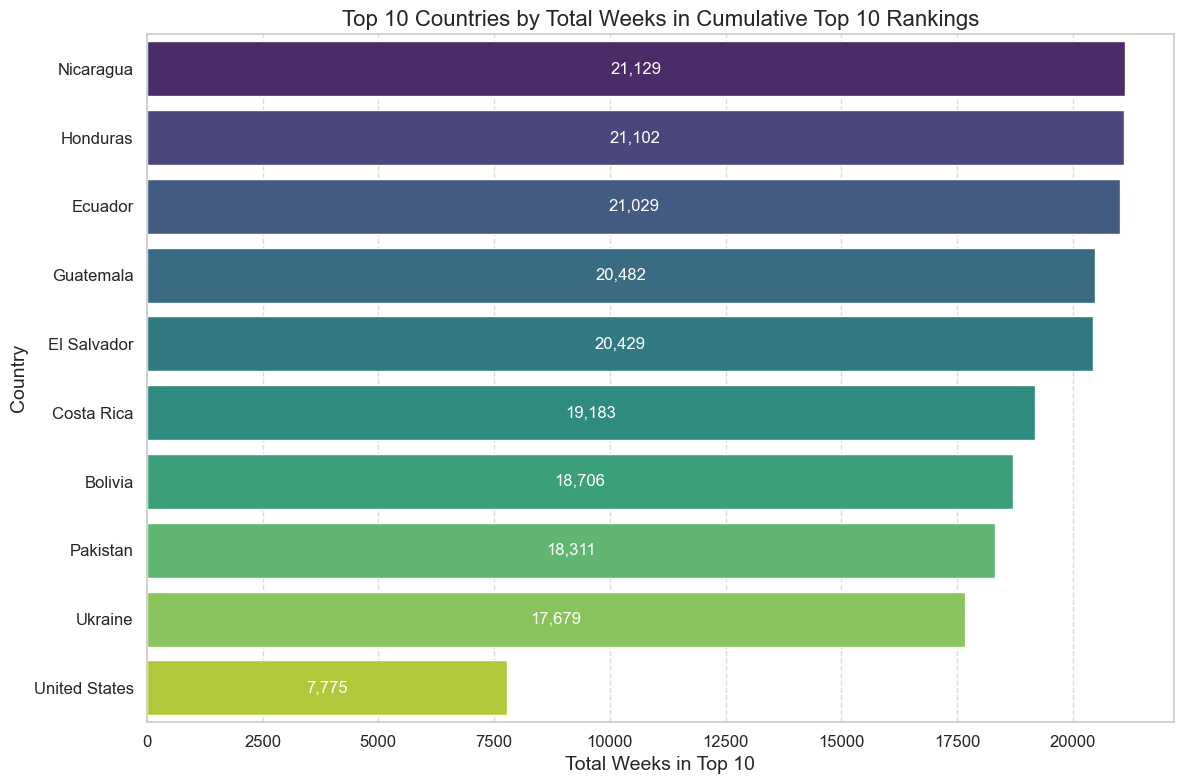

In [119]:
# Aggregate total weeks in top 10 by country
country_top10_weeks = df_countries.groupby('country_name')['cumulative_weeks_in_top_10'].sum().reset_index()

# Sort and get the top 9 countries
top_9_countries = country_top10_weeks.sort_values('cumulative_weeks_in_top_10', ascending=False).head(9)

# Check if USA is in the top 9
if 'USA' not in top_9_countries['country_name'].values:
    # Add USA if not in the top 9
    usa_data = country_top10_weeks[country_top10_weeks['country_name'] == 'United States']
    top_9_countries = pd.concat([top_9_countries, usa_data]).sort_values('cumulative_weeks_in_top_10', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='cumulative_weeks_in_top_10', y='country_name', data=top_9_countries, palette='viridis')

# Add data labels inside the bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width * 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             va='center',
             ha='center',
             color='white',
             fontsize=12)

# Add grid lines and style
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Top 10 Countries by Total Weeks in Cumulative Top 10 Rankings', fontsize=16)
plt.xlabel('Total Weeks in Top 10', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()